In [1]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [18]:
import os
import numpy as np
poly = np.polynomial.polynomial
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from everest.window import Fetch, Reader

In [4]:
outputPath = '../out'
frameName = 'Nuftest15'

In [5]:
myreader = Reader(os.path.join(outputPath, frameName) + '.frm')

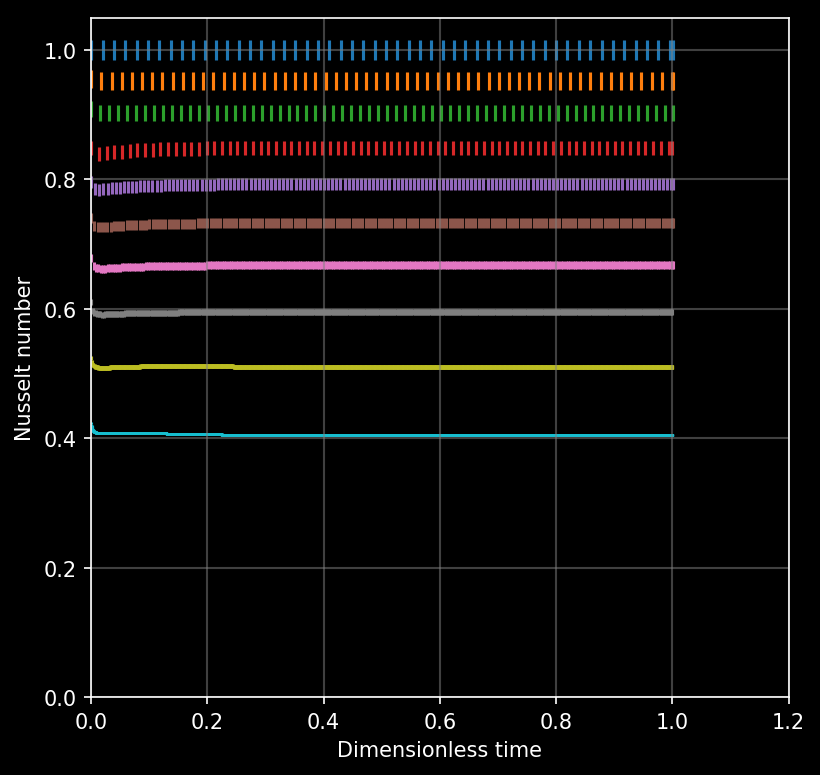

In [12]:
attrDict = myreader.view_attrs()
Ras = sorted(attrDict['Ra'].keys())
fs = sorted(attrDict['f'].keys())
# ress = sorted(attrDict['res'].keys())
ress = [16]

widthInches = 6
heightInches = 6

fig, ax = plt.subplots(
    figsize = (widthInches, heightInches), 
    dpi = 150,
    facecolor = 'black',
    edgecolor = 'black'
    )

mpl.rcParams.update({
    'text.color': "white",
    'axes.labelcolor': "white"
    })
ax.set_facecolor('black')
ax.grid(color = 'grey', linestyle = '-', linewidth = 1, alpha = 0.5)
ax.tick_params(color = 'white', labelcolor = 'white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.set_xlabel('Dimensionless time')
ax.set_ylabel('Nusselt number')
ax.set_xlim((0., 1.2))
ax.set_ylim((0., 1.05))

# resOffsets = {
#     8: 0,
#     64: 1.
#     }

for res in ress:
    resScope = attrDict['res'][res]
    for Ra in Ras[::-1]:
        RaScope = attrDict['Ra'][Ra]
        for f in fs:
            fScope = attrDict['f'][f]
            localScope = RaScope * fScope * resScope
            for scopelet in sorted(localScope):
                sysname = scopelet[0]
                observers = myreader[Fetch('system') == '_built_:' + sysname, Fetch('modeltime')]
                if len(observers):
                    modeltimes, Nus = myreader.pull(observers, ('modeltime', 'Nu'))
                    scatter = ax.scatter(
                        modeltimes.flatten(),
                        Nus.flatten(),
                        s = 1e2 * f ** 2,
                        marker = '|',
                        alpha = 1.
                        )

In [14]:
attrDict = myreader.view_attrs()
Ras = sorted(attrDict['Ra'].keys())
fs = sorted(attrDict['f'].keys())
# ress = sorted(attrDict['res'].keys())
ress = [16]

data = []
for res in ress:
    resScope = attrDict['res'][res]
    for Ra in Ras:
        RaScope = attrDict['Ra'][Ra]
        for f in fs:
            fScope = attrDict['f'][f]
            localScope = RaScope * fScope * resScope
            for scopelet in sorted(localScope):
                sysname = scopelet[0]
                observers = myreader[Fetch('system') == '_built_:' + sysname, Fetch('modeltime')]
                if len(observers):
                    modeltimes, Nus = myreader.pull(observers, ('modeltime', 'Nu'))
                    NuAv = np.average(Nus[-3])
                    data.append((res, Ra, f, NuAv))
data = np.array(data)

In [15]:
data.T

array([[ 16.        ,  16.        ,  16.        ,  16.        ,
         16.        ,  16.        ,  16.        ,  16.        ,
         16.        ,  16.        ],
       [  1.        ,   4.        ,   9.        ,  16.        ,
         25.        ,  36.        ,  49.        ,  64.        ,
         81.        , 100.        ],
       [  0.1       ,   0.2       ,   0.3       ,   0.4       ,
          0.5       ,   0.6       ,   0.7       ,   0.8       ,
          0.9       ,   1.        ],
       [  0.40451561,   0.51072965,   0.59495116,   0.66765155,
          0.73299353,   0.7930705 ,   0.84913194,   0.90195022,
          0.95210417,   0.99953114]])

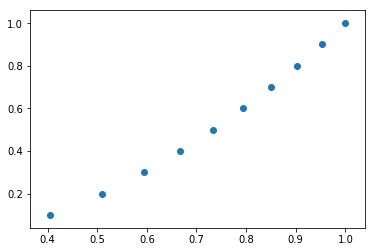

In [19]:
Nus = data.T[3]
fs = data.T[2]
plt.scatter(Nus, fs)

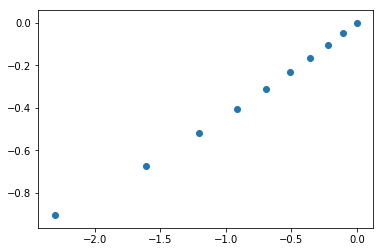

In [20]:
logfs = np.log(data.T[2])
logNus = np.log(data.T[3])
plt.scatter(logfs, logNus)

In [22]:
coefs = poly.polyfit(logfs, logNus, 1)
coefs

array([-0.02135902,  0.39707466])

In [25]:
fn_f = fs ** 0.4

In [29]:
coefs = poly.polyfit(fn_f, Nus, 1)
coefs

array([-0.01160015,  0.9966665 ])